**To Do:** <br>
- [x] Seperate between stop and go trials <br>
- [x] Seperate between correct and incorrect responses <br>
- [x] Accuracy for Go trials <br>
- [x] Go RT across time (correct responses) <br>
- [x] Accuracy for stop trails <br>
- [x] Stop RT across time (incorrect responses) <br>
- [x] Accuracy across stop trial delay times <br>
- [x] One sample t-test

In [1]:
import pandas
#read csv file and create a data frame for it
df = pandas.read_csv('subj_01.csv', header = None)
print(df)

               0  1  2       3     4
0      Go Trial:  1  1  0.5999   NaN
1      Go Trial:  1  1  0.4065   NaN
2      Go Trial:  1  1  0.5662   NaN
3      Go Trial:  1  1  0.4328   NaN
4      Go Trial:  1  1  0.4330   NaN
..           ... .. ..     ...   ...
145    Go Trial:  1  1  0.3003   NaN
146    Go Trial:  1  1  0.3830   NaN
147    Go Trial:  1  1  0.3664   NaN
148    Go Trial:  1  1  0.2991   NaN
149  Stop Trial:  0  0  0.3335  0.05

[150 rows x 5 columns]


In [432]:
#label the columns of the data frame
df.columns = ['', 'trial_type', 'response', 'trial_rt', 'stop_delay']
print(df)

                  trial_type  response  trial_rt  stop_delay
0      Go Trial:           1         1    0.5999         NaN
1      Go Trial:           1         1    0.4065         NaN
2      Go Trial:           1         1    0.5662         NaN
3      Go Trial:           1         1    0.4328         NaN
4      Go Trial:           1         1    0.4330         NaN
..           ...         ...       ...       ...         ...
145    Go Trial:           1         1    0.3003         NaN
146    Go Trial:           1         1    0.3830         NaN
147    Go Trial:           1         1    0.3664         NaN
148    Go Trial:           1         1    0.2991         NaN
149  Stop Trial:           0         0    0.3335        0.05

[150 rows x 5 columns]


In [282]:
#overall acccuracy
import numpy as np
accuracy = [np.mean(df.loc[:,'response'])]
print(accuracy)

[0.9466666666666667]


In [273]:
#slice rows for Go trials and Stop trials
df_go = df.loc[(df.loc[:,'trial_type'] > 0),:]
df_stop = df.loc[(df.loc[:,'trial_type'] < 1), :]
df_stop_incc = df_stop.loc[(df_stop.loc[:,'response']< 1),:]
print(df_go.head())
print(df_stop.head())
print(df_stop_incc.head())

              trial_type  response  trial_rt  stop_delay
0  Go Trial:           1         1    0.5999         NaN
1  Go Trial:           1         1    0.4065         NaN
2  Go Trial:           1         1    0.5662         NaN
3  Go Trial:           1         1    0.4328         NaN
4  Go Trial:           1         1    0.4330         NaN
                 trial_type  response  trial_rt  stop_delay
6   Stop Trial:           0         1    0.0000        0.10
15  Stop Trial:           0         1    0.0000        0.05
18  Stop Trial:           0         0    0.5336        0.20
20  Stop Trial:           0         1    0.0000        0.10
25  Stop Trial:           0         1    0.0000        0.05
                  trial_type  response  trial_rt  stop_delay
18   Stop Trial:           0         0    0.5336        0.20
93   Stop Trial:           0         0    0.4333        0.10
105  Stop Trial:           0         0    0.3989        0.05
111  Stop Trial:           0         0    0.4500      

In [283]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
#Accuracy for both stop and go seperately 
stop_acc = [np.mean(df_stop.loc[:,'response'])]
go_acc = [np.mean(df_go.loc[:,'response'])]
print(stop_acc)
print(go_acc)

[0.7333333333333333]
[1.0]


In [275]:
#testing chaning trial_type numbers 
df.loc[df.trial_type ==0, ('trial_type')] = -1
print(df)


                  trial_type  response  trial_rt  stop_delay
0      Go Trial:           1         1    0.5999         NaN
1      Go Trial:           1         1    0.4065         NaN
2      Go Trial:           1         1    0.5662         NaN
3      Go Trial:           1         1    0.4328         NaN
4      Go Trial:           1         1    0.4330         NaN
..           ...         ...       ...       ...         ...
145    Go Trial:           1         1    0.3003         NaN
146    Go Trial:           1         1    0.3830         NaN
147    Go Trial:           1         1    0.3664         NaN
148    Go Trial:           1         1    0.2991         NaN
149  Stop Trial:          -1         0    0.3335        0.05

[150 rows x 5 columns]


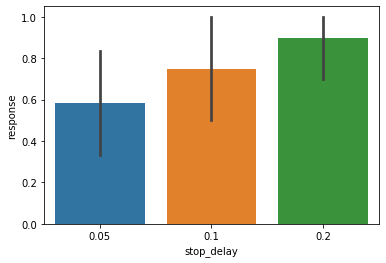

In [276]:
#sns.barplot(data=df, x = 'trial_type', y='response')
#testing creating bar plots for individual stop_delays
sns.barplot(data=df_stop, x = 'stop_delay', y = 'response')
plt.show()

In [435]:
#Testing replacing all 0 in trial_rt to nan
df.loc[df.trial_rt ==0, ('trial_rt')] = np.nan

print(df)

                  trial_type  response  trial_rt  stop_delay
0      Go Trial:           1         1    0.5999         NaN
1      Go Trial:           1         1    0.4065         NaN
2      Go Trial:           1         1    0.5662         NaN
3      Go Trial:           1         1    0.4328         NaN
4      Go Trial:           1         1    0.4330         NaN
..           ...         ...       ...       ...         ...
145    Go Trial:           1         1    0.3003         NaN
146    Go Trial:           1         1    0.3830         NaN
147    Go Trial:           1         1    0.3664         NaN
148    Go Trial:           1         1    0.2991         NaN
149  Stop Trial:           0         0    0.3335        0.05

[150 rows x 5 columns]


<h3> Subject-level analysis function </h3>

In [12]:
import pandas
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def SubjectStats(fileName):
    #read from csv file
    df = pandas.read_csv(fileName)
    
    #give column names
    df.columns = ['', 'trial_type', 'response', 'trial_rt', 'stop_delay']
    
    #Stop trial changed to -1
    df.loc[df.trial_type ==0, ('trial_type')] = -1
    
    #RT = 0 changed to NaN value
    df.loc[df.trial_rt ==0, ('trial_rt')] = np.nan
   
    df.loc[df.stop_delay == np.nan, ('stop_delay')] = 0 
    
    #STOP, GO
    t_idx = [-1,1]
    labels = ['Stop','Go']
    
    #Create labels for each stop_delay 
    st_idx = [0.05,0.1,0.2]
    slabels = {'Short','Medium','Long'}
    
    #return values
    accuracy = []
    stop_delay_acc = []
    rt = []
    
    fig,axs = plt.subplots(ncols = 3, figsize = (11.7,8.27))
    #set limits of x axis for color error plot
    axs[0].set_xlim(0,2)
    axs[1].set_xlim(-1,1)
    axs[2].set_xlim(.05,.10,.20)
    #insert file name above figure to identify subject
    fig.suptitle(fileName)

    
    for i in range(2):
        #slice rows based on Go/Stop trial
        df1 = df.loc[(df.loc[:,'trial_type'] == t_idx[i]),:]
        accuracy.append(np.mean(df1.loc[:,'response']))
        rt.append(np.mean(df1.loc[:,'trial_rt']))
        sns.distplot(df1.loc[:,'trial_rt'],label = labels[i], hist=False, ax=axs[0])
        
        sns.barplot(data = df, x = 'trial_type', y = 'response',ax = axs[1])
    
    
    for i in range(3):
        #slice rows based on stop_delay
        df_stop = df.loc[(df.loc[:,'stop_delay'] == st_idx[i]),:]
        stop_delay_acc.append(np.mean(df_stop.loc[:,'response']))
        sns.barplot(data = df, x = 'stop_delay', y = 'response',ax = axs[2] )
        
    
    plt.legend()
    plt.show()
    
    return accuracy, stop_delay_acc,  rt


No handles with labels found to put in legend.


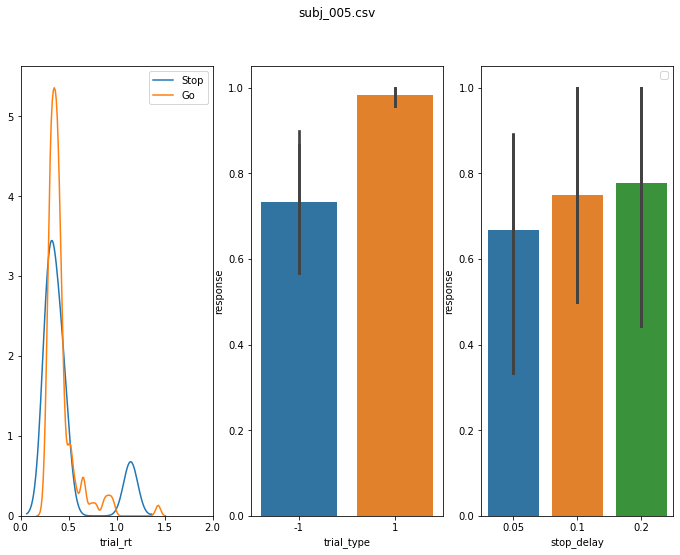

([0.7333333333333333, 0.9831932773109243],
 [0.6666666666666666, 0.75, 0.7777777777777778],
 [0.447375, 0.4156871794871798])

In [7]:
SubjectStats('subj_005.csv')

No handles with labels found to put in legend.


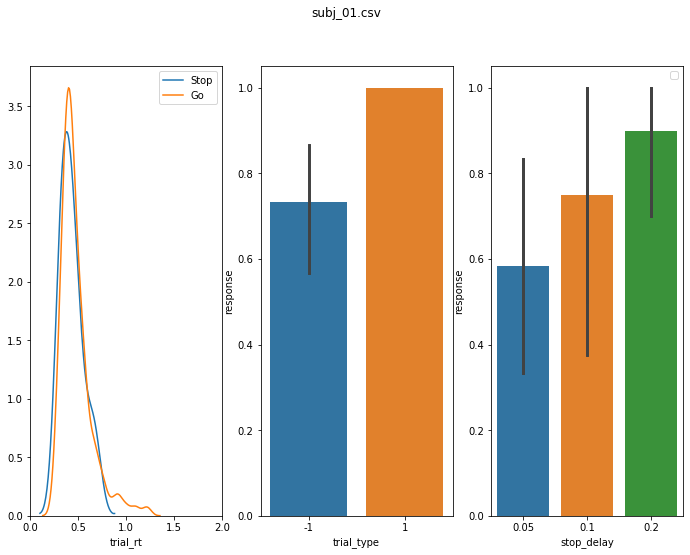

No handles with labels found to put in legend.


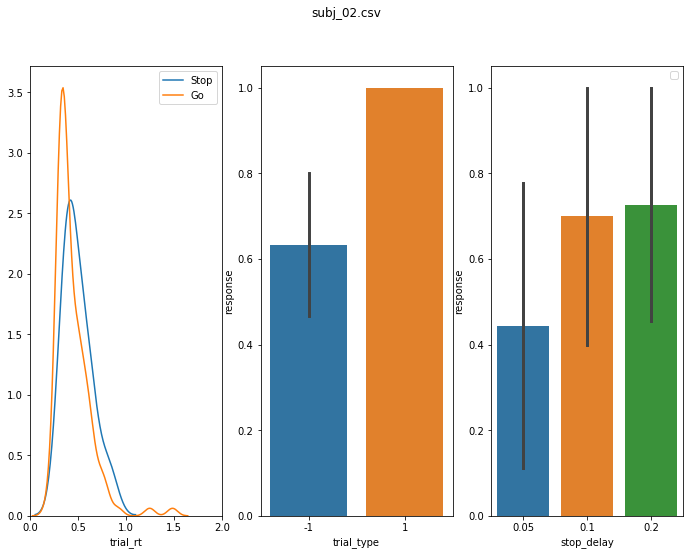

No handles with labels found to put in legend.


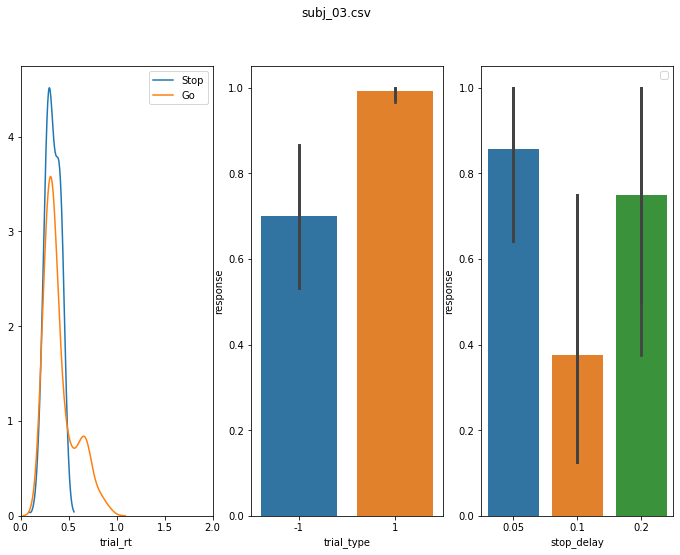

No handles with labels found to put in legend.


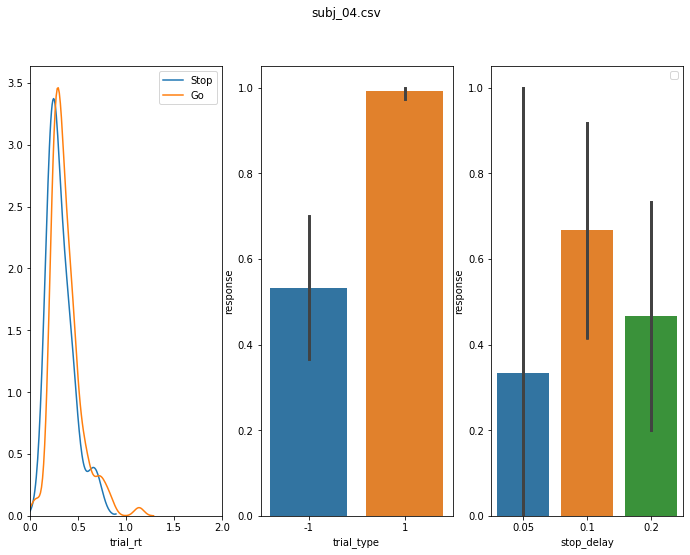

No handles with labels found to put in legend.


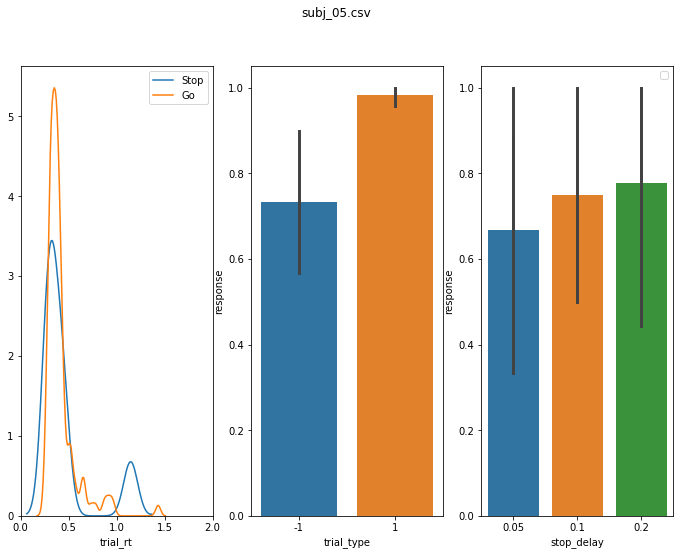

(25, 5)


In [21]:
#create an empty data frame with column names ready
data = {'trial_type': [], 'accuracy':[], 'rt':[], 'stop_delay':[], 'stop_delay_acc':[]}
#apply data to a data fram
df = pandas.DataFrame(data = data)

#create a for loop for looping at each data file
for i in range (1,6):
    accuracy, stop_delay_acc, rt = SubjectStats('subj_'+ f"{i:02d}" +'.csv')
    data = {'trial_type': ['Stop', 'Go'], 'accuracy':accuracy, 'rt':rt}
    df1 = pandas.DataFrame (data = data)
    df = df.append(df1)
    
#create a new for loop for stop_delay since the arrays are different sizes 
for i in range(1,6):
    data = {'stop_delay': ['Short', 'Medium','Long'], 'stop_delay_acc':stop_delay_acc}
    df1 = pandas.DataFrame (data = data)
    df = df.append(df1)
    
print(df.shape)
df.to_csv('GroupData.csv')

<h3> Group level analyis </h3>

In [24]:
#make surer that all the informaiton is there
df = pandas.read_csv('GroupData.csv')
print(df.tail())

    Unnamed: 0 trial_type  accuracy  rt stop_delay  stop_delay_acc
10         NaN        NaN       NaN NaN     Medium        0.750000
11         NaN        NaN       NaN NaN       Long        0.777778
12         NaN        NaN       NaN NaN      Short        0.666667
13         NaN        NaN       NaN NaN     Medium        0.750000
14         NaN        NaN       NaN NaN       Long        0.777778


In [25]:
#statistical analysis for Go accuracy vs stop accuracy
Go = df.loc[df.loc[:,'trial_type'] == 'Go', 'accuracy']
Stop = df.loc[df.loc[:,'trial_type'] == 'Stop', 'accuracy']

dif = Go.to_numpy() - Stop.to_numpy()
t,p = stats.ttest_1samp(dif,0)
print(t,p)

8.483130210786546 0.0010585905310750204


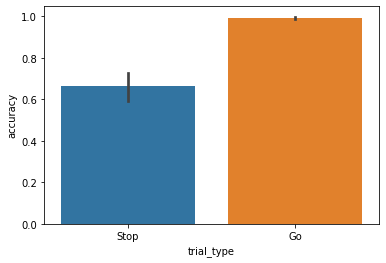

In [26]:
#bar plot of go accuracy vs stop accuracy
sns.barplot(data = df, x = 'trial_type', y = 'accuracy')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

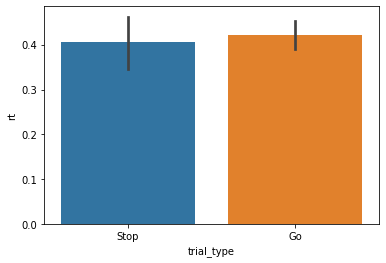

In [27]:
#look at the difference in rt between stop and go trials
sns.barplot(data = df, x = 'trial_type', y = 'rt')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

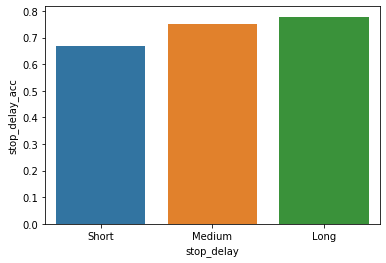

In [28]:
#bar graph for differenct stop_delays
sns.barplot(data = df, x = 'stop_delay', y = 'stop_delay_acc')
plt.show